In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Superstore dataset
df = pd.read_excel('Superstore - Copy.xlsx')  # Replace with the actual path to your dataset
df.head()

,row id,customer id,order date,shipping date,ship mode,customer id.1,customer name,segment,country,city,...,postal code,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,1,CA2016152156,2023-07-01,2021-07-08,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURBO10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA2016152156,2022-07-03,2023-05-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURCH10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA2016138688,2021-08-16,2021-11-02,Second Class,DV13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFFLA10000240,Office Supplies,Labels,SelfAdhesive Address Labels for Typewriters by...,14.6200,2,0.00,6.8714
3,4,US2015108966,2021-04-14,2022-12-21,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,FURTA10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,383.0310
4,5,US2015108966,2021-01-02,2021-08-26,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFFST10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# show columns
df.columns

Index(['row id', 'customer id', 'order date', 'shipping date', 'ship mode',
       'customer id.1', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


## Question 1

**What is the distribution of sales and profit across different shipping modes, and how does it vary based on the segment of customers (Consumer, Corporate, and Home Office)?**

In [4]:
# Group and summarize the data
grouped_data = df.groupby(['ship mode', 'segment'])[['sales', 'profit']].sum().reset_index()

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

Text(0, 0.5, 'Total Sales')

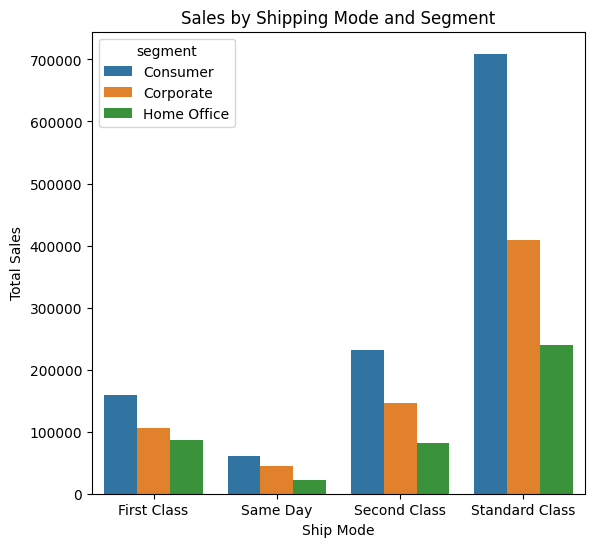

In [14]:
# Set the figure size
plt.figure(figsize=(14, 6))
# Create a bar plot for sales
plt.subplot(1, 2, 1)
sns.barplot(data=grouped_data, x='ship mode', y='sales', hue='segment')
plt.title('Sales by Shipping Mode and Segment')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

Text(0, 0.5, 'Total Profit')

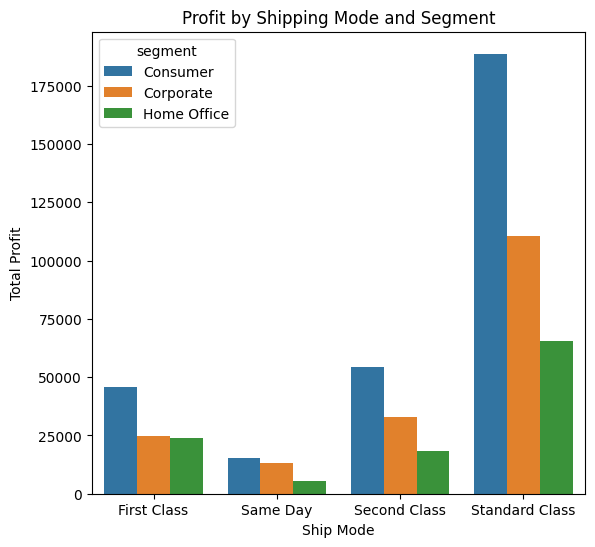

In [15]:
# Set the figure size
plt.figure(figsize=(14, 6))
# Create a bar plot for profit
plt.subplot(1, 2, 2)
sns.barplot(data=grouped_data, x='ship mode', y='profit', hue='segment')
plt.title('Profit by Shipping Mode and Segment')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

In [22]:
# Descriptive Statistics:
sales_mean = df['sales'].mean()
profit_mean = df['profit'].mean()
print(sales_mean)
print(profit_mean)

229.82735318318316
59.91659273273273


In [25]:
# Data Visualization:

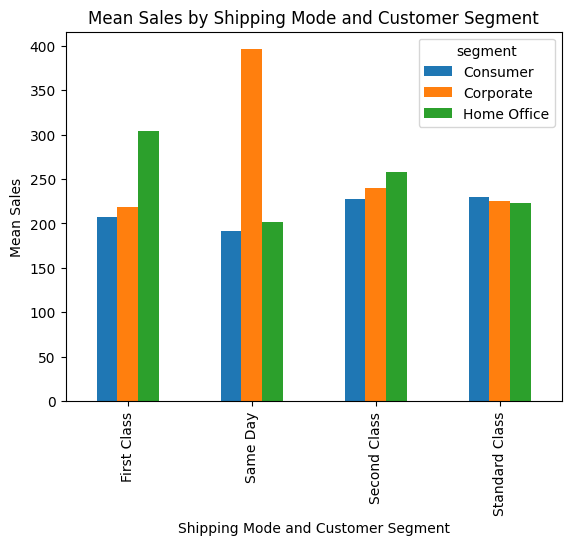

In [23]:
# Group the data by shipping mode and customer segment
grouped_data = df.groupby(['ship mode', 'segment'])['sales'].mean().unstack()

# Create a bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Shipping Mode and Customer Segment')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Shipping Mode and Customer Segment')
plt.show()


In [26]:
# Hypothesis Testing:

In [29]:
from scipy.stats import f_oneway

# Extract the unique shipping modes from your DataFrame
shipping_modes = df['ship mode'].unique()

# Create a list of data for each shipping mode
mode_data = [df[df['ship mode'] == mode]['sales'] for mode in shipping_modes]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*mode_data)

print(f_statistic)
print(p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There is a significant difference in sales among shipping modes.")
else:
    print("There is no significant difference in sales among shipping modes.")


0.12052154231506133
0.9480604046522227
There is no significant difference in sales among shipping modes.


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['ship mode', 'segment']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on the test set
y_pred = model.predict(X_test)

# Assess the model's performance (you can use different metrics)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 277574.25045491365
R-squared: -0.0011321917909017376


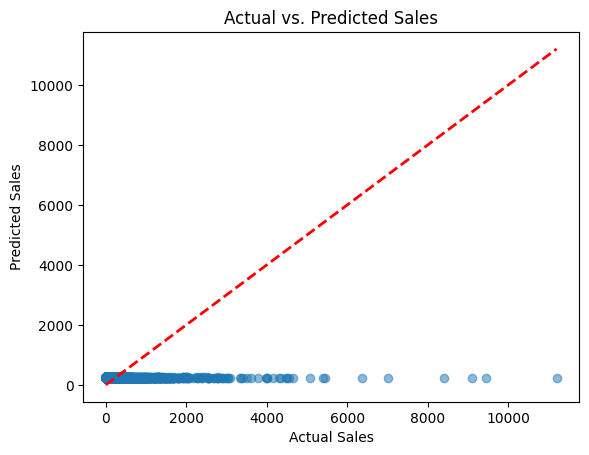

In [33]:
# Create a scatterplot of actual vs. predicted sales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")

# Add a regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.show()


In [36]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     - -------------------------------------- 0.3/9.2 MB 7.9 MB/s eta 0:00:02
     - -------------------------------------- 0.4/9.2 MB 5.1 MB/s eta 0:00:02
     -- ------------------------------------- 0.6/9.2 MB 5.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 4.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/9.2 MB 4.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/9.2 MB 4.4 MB/s eta 0:00:02
     ----- ---------------------------------- 1.2/9.2 MB 4.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.3/9.2 MB 4.3 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.2 MB 4.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.7/9.2 MB 4.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.8/9.2 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 2.0/9.2 MB 4.1 MB/s eta 0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.cluster import KMeans

X = df[['sales', 'profit']]
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
clusters = kmeans.fit_predict(X)


C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


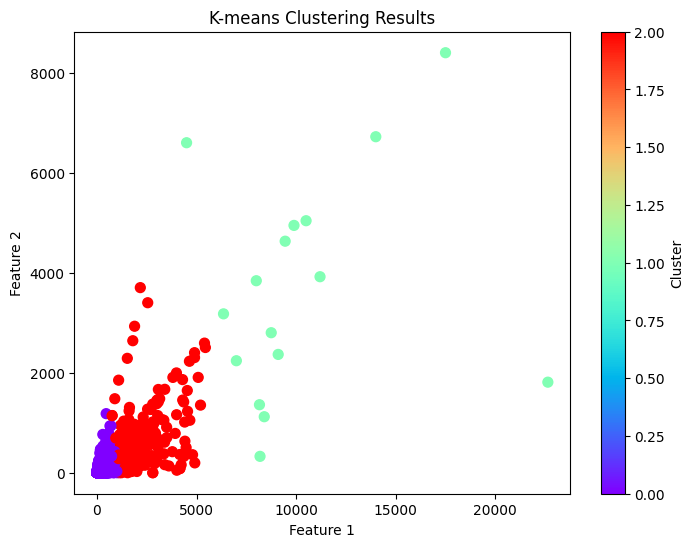

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='rainbow', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')

plt.show()